## Week9
Version/Date: Nov 15, 2017

### Exercise
> PREDICT_400-DL_SEC56
> Week9 Discussion

### File(s)
> Probability Density Function.ipynb

### Instructions
Consider the probability density function f(x) = (3/26)x2 on [1, 3]. On the same interval, consider the functions g(x) = (3/26)x3 and h(x) = (x – 30/13)(3/26)x3, which when integrated over the interval [1, 3] represent the mean and variance, respectively. Using Python, verify that f(x) is a probability density function, that the mean is 30/13, the variance is approximately 0.2592 and determine the standard deviation. Is there any relationship between this and the normal probability distribution? Explain.

Also, use Python to graph these three functions together (use different colors for each) and indicate the mean and standard deviation on the x-axis. Be sure to share your Python code and output.

### Description
The code below attempts to demonstrate the probability density function similar to this week's example code. I'm also experimenting with the Seaborn module for this. More examples can be found here https://seaborn.pydata.org/

In [51]:
# The following line is included so that plt.show() is not required for inline plots
%matplotlib inline

# Notebook Imports
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
print('imports completed')

imports completed


f(1) = 0.1154 which is non-negative
If all values are non-negative, the first condition is satisfied.
Soln of the integration is 1.0
If soln of the integral equals 1, the second condition is satisfied.


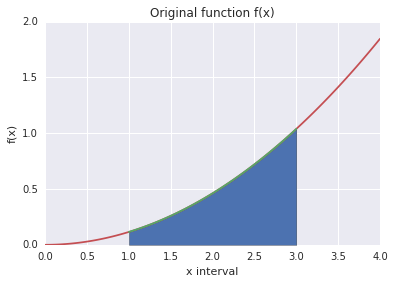

In [52]:
# Test using numpy
nsamples = 100
lower_bound = 1
upper_bound = 3
x = np.linspace(lower_bound,upper_bound,nsamples)
#print(x)
outer = np.linspace(0,4,nsamples)

def f(x):
    return (3 / 26) * pow(x,2)

plt.title('Original function f(x)')
plt.ylabel('f(x)')
plt.xlabel('x interval')
plt.plot(outer, f(outer), 'r', x, f(x), 'g')
plt.fill_between(x, f(x))

'''To be a Probaility Density Function, 
f(x) must be satisfy the following conditions for any variable in the interval.
1. f(x) >= 0 for all x in the interval
2. Integral of f(x) must equal 1 over the interval'''

# Define the Integral of f(x), F(x):
def F(x):
    return pow(x,3) / 26

'''
First, check plot and verify all points are positive.
We can see from plot below that the function f(x) is positive through the interval
    plotted below in blue. And lowest value is
'''
print('f(1) = ' + str(round(f(lower_bound),4)) + ' which is non-negative')

# Another way to check this would be to take each sample value in our range [1,3] plug it into
# our function f(x) and verify each value is positive.
for value in x:
    if f(value) <= 0:
        print('negative result found! - By definition, f(x) cannot be a probability density function')
# if none found, the above message will not appear and the first requirement is satisfied
print('If all values are non-negative, the first condition is satisfied.')

'''
Now take a look at numbers in the set x.
Probability that x is between 1 and 3 is 100%
'''
# The definite integral for f(x) is given by F(x) = (x**3) / 26
# Take F(3) - F(1) and make sure it equals 1 (representing 100%)
# In other words, all possible solutions must add up to 100%
intsoln = F(3) - F(1)
print('Soln of the integration is ' + str(intsoln))
print('If soln of the integral equals 1, the second condition is satisfied.')

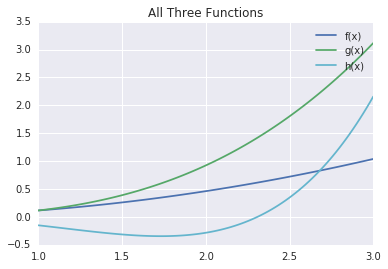

In [53]:
'''
Now lets define the other two functions and plot the three functions together
'''
def g(x):
    return (3 / 26) * pow(x,3)

def h(x):
    return (x - (30 / 13)) * g(x)

plt.title('All Three Functions')
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, g(x), 'g', label='g(x)')
plt.plot(x, h(x), 'c', label='h(x)')
plt.legend()

In [54]:
'''
The mean or expected value is given by the following function over range [1,3]
'''
def u(x):
    return (3/26) * ((x**4) / 4)
mean = u(3) - u(1)
print('Mean is 30/13, or about ' + str(mean))

Mean is 30/13, or about 2.307692307692308


In [55]:
'''
The variance is given by the following function over range [1,3]
'''
def v(x):
    return (3*x**4 * (26*x - 75)) / 3380
variance = v(3) - v(1)
print('Varience is about ' + str(variance))

Varience is about 0.2591715976331361


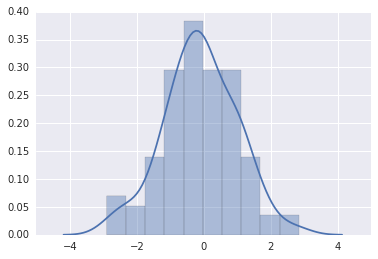

In [60]:
''' Show normal distribution plot using Seaborn?
This gives a histogram showing random values on the interval normalized to relative frequencies of appearance.
Values for sample size and bin size can be modified to view affects. Run multiple times to view different random sets.
'''
sample_size = 100
bin_count = 10
# Tests for different random distributions
#x_random = np.random.random(size=sample_size)
#x_normal = np.random.normal(size=sample_size)
#x_uniform = np.random.uniform(size=sample_size)
#x = [x_random, x_normal, x_uniform]
#for item in x:
#    sns.distplot(item)

# Show dist plot for the samples/bins indicated above
sns.distplot(np.random.normal(size=sample_size), bin_count)